In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 76 bytes


In [2]:
!kaggle datasets download -d shebrahimi/financial-distress

Dataset URL: https://www.kaggle.com/datasets/shebrahimi/financial-distress
License(s): other
financial-distress.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip /content/financial-distress.zip


Archive:  /content/financial-distress.zip
replace Financial Distress.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

In [5]:
data = pd.read_csv("/content/Financial Distress.csv")

In [6]:
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [7]:
data.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896772,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


In [8]:
print("Number of companies:",data.Company.unique().shape)

Number of companies: (422,)


In [9]:
'''The feature x80 is a categorical variable,
 which means that it can take on a limited number of discrete values.
 Since this feature is not related to the financial distress of the company,
 it is being removed from the dataset using the code snippet provided earlier'''
data = data[data.columns.drop(list(data.filter(regex='x80')))]

In [10]:
data.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x73,x74,x75,x76,x77,x78,x79,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,36.0,85.437,27.07,26.102,16.000,16.0,0.2,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,36.0,107.090,31.31,30.194,17.000,16.0,0.4,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,33.0,54.806,39.80,38.377,17.167,16.0,5.6,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,36.0,85.437,27.07,26.102,16.000,16.0,0.2,1.251000,7,27


In [11]:
null_values = data.isnull().sum()
print("Null value counts:")
print(null_values)

Null value counts:
Company               0
Time                  0
Financial Distress    0
x1                    0
x2                    0
                     ..
x78                   0
x79                   0
x81                   0
x82                   0
x83                   0
Length: 85, dtype: int64


In [12]:
# Creating target vector and feature matrix
Y = data.iloc[:,2].values
for y in range(0,len(Y)): # Coverting target variable from continuous to binary form
       if Y[y] > -0.5:
              Y[y] = 0
       else:
              Y[y] = 1
X = data.iloc[:,3:].values

In [13]:
data

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x73,x74,x75,x76,x77,x78,x79,x81,x82,x83
0,1,1,0.0,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,36.0,85.437,27.07,26.102,16.000,16.0,0.2,0.060390,30,49
1,1,2,0.0,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,36.0,107.090,31.31,30.194,17.000,16.0,0.4,0.010636,31,50
2,1,3,0.0,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,-0.455970,32,51
3,1,4,1.0,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,33.0,54.806,39.80,38.377,17.167,16.0,5.6,-0.325390,33,52
4,2,1,0.0,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,36.0,85.437,27.07,26.102,16.000,16.0,0.2,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.0,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,...,22.0,100.000,100.00,100.000,17.125,14.5,-7.0,0.436380,4,41
3668,422,11,0.0,1.9615,0.216440,0.20095,0.21642,0.203590,0.189870,1.93820,...,28.0,91.500,130.50,132.400,20.000,14.5,-16.0,0.438020,5,42
3669,422,12,0.0,1.7099,0.207970,0.26136,0.21399,0.193670,0.183890,1.68980,...,32.0,87.100,175.90,178.100,20.000,14.5,-20.2,0.482410,6,43
3670,422,13,0.0,1.5590,0.185450,0.30728,0.19307,0.172140,0.170680,1.53890,...,30.0,92.900,203.20,204.500,22.000,22.0,6.4,0.500770,7,44


In [37]:


dropData = data.drop(['Financial Distress'], axis = 1)


In [38]:
dropData

,Company,Time,x1,x2,x3,x4,x5,x6,x7,x8,...,x73,x74,x75,x76,x77,x78,x79,x81,x82,x83
0,1,1,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,...,36.0,85.437,27.07,26.102,16.000,16.0,0.2,0.060390,30,49
1,1,2,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,...,36.0,107.090,31.31,30.194,17.000,16.0,0.4,0.010636,31,50
2,1,3,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,...,35.0,120.870,36.07,35.273,17.000,15.0,-0.2,-0.455970,32,51
3,1,4,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,...,33.0,54.806,39.80,38.377,17.167,16.0,5.6,-0.325390,33,52
4,2,1,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,...,36.0,85.437,27.07,26.102,16.000,16.0,0.2,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,1.091500,...,22.0,100.000,100.00,100.000,17.125,14.5,-7.0,0.436380,4,41
3668,422,11,1.9615,0.216440,0.20095,0.21642,0.203590,0.189870,1.93820,1.000100,...,28.0,91.500,130.50,132.400,20.000,14.5,-16.0,0.438020,5,42
3669,422,12,1.7099,0.207970,0.26136,0.21399,0.193670,0.183890,1.68980,0.971860,...,32.0,87.100,175.90,178.100,20.000,14.5,-20.2,0.482410,6,43
3670,422,13,1.5590,0.185450,0.30728,0.19307,0.172140,0.170680,1.53890,0.960570,...,30.0,92.900,203.20,204.500,22.000,22.0,6.4,0.500770,7,44


In [19]:
num_zeros = 0
for num in Y:
       if num == 0:
              num_zeros = num_zeros+1
num_ones = len(Y) - num_zeros

print("Number of observations for BANKRUPT companies(1's):",num_ones)
print("Number of observations for HEALTHY companies(0's):",num_zeros)

Number of observations for BANKRUPT companies(1's): 136
Number of observations for HEALTHY companies(0's): 3536


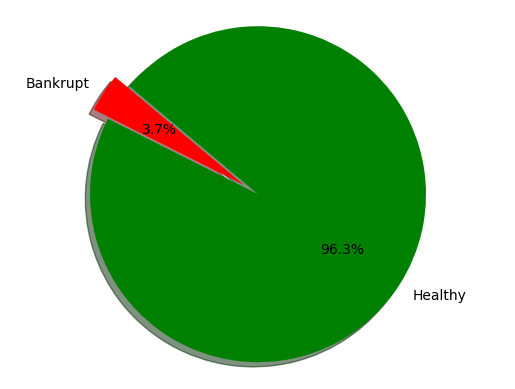

In [20]:

import matplotlib.pyplot as plt
labels = "Bankrupt", "Healthy"
sizes = [num_ones, num_zeros]
colors = ["red", "green"]
explode = [0.1, 0]  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()


In [21]:
X_train = np.array(X)
y_train = np.array(Y)

# OverSampling Data

In [22]:
y_train = (np.matrix(y_train)).T
y_train = pd.DataFrame(y_train)
y_train.columns = ["Financial_Distress"]
X_train = pd.DataFrame(X_train)
frame = [X_train,y_train]
train_data = pd.concat(frame,axis = 1)
bankrupt_companies = train_data[train_data.Financial_Distress == 1]

feat_mat = bankrupt_companies.iloc[:,:-1].values
response = bankrupt_companies.iloc[:,-1].values
col_mean = np.zeros(shape=(82,1))
col_std = np.zeros(shape=(82,1))
Dim_1 = np.shape(feat_mat)
for i in range(0,Dim_1[1]):
       col_mean[i,0] = np.mean(feat_mat[:,i])
       col_std[i,0] = np.std(feat_mat[:,i])
col_mean_and_std = np.hstack((col_mean,col_std))

added_data = np.zeros(shape=(3000,Dim_1[1]))
for i in range (0,len(col_mean_and_std)):
       mean_ = col_mean_and_std[i,0]
       std_ = col_mean_and_std[i,1]
       added_data[:,i] = np.random.normal(mean_,std_,3000)
added_y = np.ones(shape=(3000,1))

X_resampled = np.vstack((X_train,added_data))
y_train = np.array(y_train)
y_resampled = np.vstack((y_train,added_y))

In [23]:
X = X_resampled
Y = y_resampled

In [24]:

num_zeros = 0
for num in Y:
       if num == 0:
              num_zeros = num_zeros+1
num_ones = len(Y) - num_zeros

print("Number of observations for BANKRUPT companies(1's):",num_ones)
print("Number of observations for HEALTHY companies(0's):",num_zeros)



Number of observations for BANKRUPT companies(1's): 3136
Number of observations for HEALTHY companies(0's): 3536


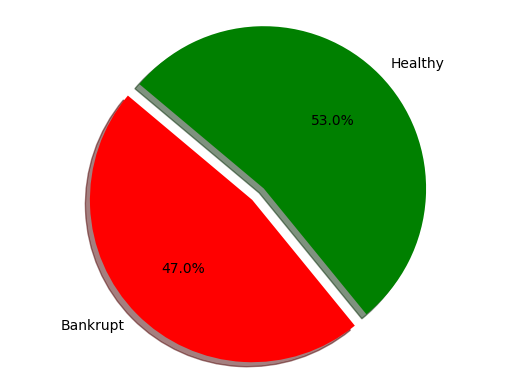

In [25]:

labels = "Bankrupt", "Healthy"
sizes = [num_ones, num_zeros]
colors = ["red", "green"]
explode = [0.1, 0]  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.show()


In [26]:
''' Standardizing the range of features to have a mean of 0 and standard deviation of 1
allows for better performance and faster convergence during model training.'''
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.30, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
X_train.shape

(4670, 82)

In [28]:
X_test.shape


(2002, 82)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

classifier = RandomForestClassifier(n_estimators=50, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

<ipython-input-29-0720c0a58859>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


Accuracy: 0.9785214785214785
Precision: 0.9901639344262295
Recall: 0.9638297872340426
F1 score: 0.9768194070080862


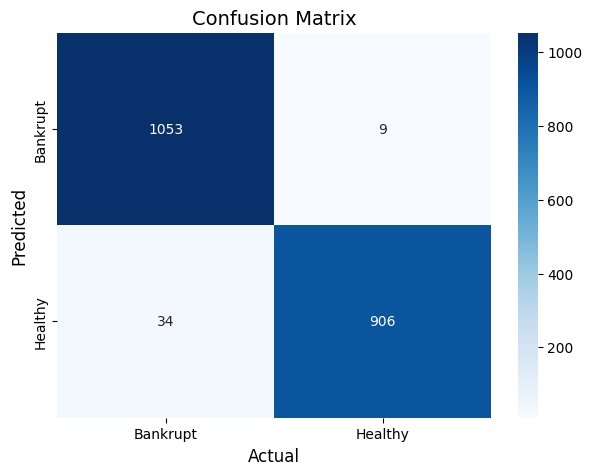

In [30]:
import seaborn as sns

cm_plot = plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)


plt.ylabel("Predicted", fontsize=12)
plt.xlabel("Actual", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)

plt.show()


# **Particle Swarm Optimization**

In [31]:
!pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.0 MB/s eta 0:00:00


In [32]:
X.shape

(6672, 82)

In [33]:
import numpy as np
import pyswarms as ps
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

max_bound = 1.0 * np.ones(X.shape[1])
min_bound = 0.0 * np.ones(X.shape[1])
bounds = (min_bound, max_bound)

def f_per_particle(m, X, y, alpha):
    total_features = X.shape[1]
    X_subset = X[:, m > 0.5]
    if X_subset.shape[1] == 0:
        return float('inf')
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.3, random_state=42)
    clf = RandomForestClassifier(n_estimators=50, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    j = (alpha * (1.0 - accuracy) + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))
    return j

def f(x, X, y, alpha=0.5):
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], X, y, alpha) for i in range(n_particles)]
    return np.array(j)

# Initialize swarm
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=X.shape[1], options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=100, X=X, y=Y.ravel())


2024-05-11 12:19:15,781 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.118
2024-05-11 13:54:08,952 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.11849735630223435, best pos: [0.54990376 0.79372606 0.19339622 0.698095   0.79823378 0.57119896
 0.96863791 0.79598443 0.6166011  0.60993771 0.68477107 0.67955483
 0.55906153 0.84769994 0.04145932 0.54417864 0.56205293 0.64784042
 0.79213818 0.97844534 0.35917792 0.83055001 0.26022129 0.84704959
 0.61665625 0.61739695 0.5982484  0.52441424 0.67647812 0.84679876
 0.34651353 0.51952444 0.49426377 0.70080748 0.7349445  0.67381714
 0.61198868 0.57524222 0.99445051 0.34237117 0.18230832 0.44959606
 0.99655763 0.36924992 0.39765817 0.60642499 0.24637343 0.62043271
 0.84596896 0.76819502 0.85030312 0.23668958 0.78185942 0.68186341
 0.73182605 0.66514017 0.85118923 0.56265736 0.2629066  0.98834428
 0.6531

In [35]:

best_pos = np.array(pos)
print("Position as NumPy Array:", best_pos)


Position as NumPy Array: [0.54990376 0.79372606 0.19339622 0.698095   0.79823378 0.57119896
 0.96863791 0.79598443 0.6166011  0.60993771 0.68477107 0.67955483
 0.55906153 0.84769994 0.04145932 0.54417864 0.56205293 0.64784042
 0.79213818 0.97844534 0.35917792 0.83055001 0.26022129 0.84704959
 0.61665625 0.61739695 0.5982484  0.52441424 0.67647812 0.84679876
 0.34651353 0.51952444 0.49426377 0.70080748 0.7349445  0.67381714
 0.61198868 0.57524222 0.99445051 0.34237117 0.18230832 0.44959606
 0.99655763 0.36924992 0.39765817 0.60642499 0.24637343 0.62043271
 0.84596896 0.76819502 0.85030312 0.23668958 0.78185942 0.68186341
 0.73182605 0.66514017 0.85118923 0.56265736 0.2629066  0.98834428
 0.65318048 0.68659013 0.01616124 0.88079922 0.52865842 0.45912063
 0.66475385 0.68313095 0.16595039 0.6972342  0.57707387 0.75400646
 0.6731462  0.53979792 0.53759245 0.66467287 0.78831644 0.83444544
 0.60765366 0.48841887 0.97724881 0.52356413]


In [45]:

threshold = 0.6
selected_features_mask = best_pos > threshold
feature_names = dropData.iloc[:,2:].columns
selected_features = feature_names[selected_features_mask]
print("Selected Features:", selected_features)

Selected Features: Index(['x2', 'x4', 'x5', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x14', 'x18',
       'x19', 'x20', 'x22', 'x24', 'x25', 'x26', 'x29', 'x30', 'x34', 'x35',
       'x36', 'x37', 'x39', 'x43', 'x46', 'x48', 'x49', 'x50', 'x51', 'x53',
       'x54', 'x55', 'x56', 'x57', 'x60', 'x61', 'x62', 'x64', 'x67', 'x68',
       'x70', 'x72', 'x73', 'x76', 'x77', 'x78', 'x79', 'x82'],
      dtype='object')


In [46]:
selected=selected_features.values.tolist()

In [47]:

mask = np.isin(data.iloc[:,3:].columns,selected)
X_selected = X[:,mask]

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=42)


In [49]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (4670, 49)
y_train (4670, 1)
X_test (2002, 49)
y_test (2002, 1)


<ipython-input-50-4f3a2993bd64>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


Precision: 0.9911209766925638
Recall: 0.9706521739130435
F1 score: 0.9807797913234487
Accuracy: 0.9825174825174825


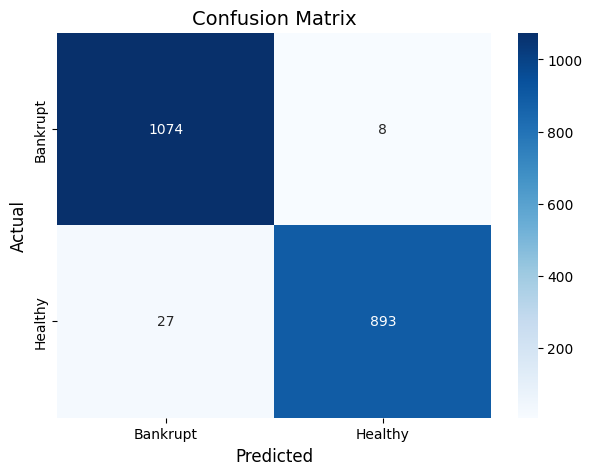

In [50]:

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

classifier = RandomForestClassifier(n_estimators=50, random_state=42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("Accuracy:", accuracy)


# Create a confusion matrix plot
cm_plot = plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)

# Show the plot
plt.show()
